## Логистическая регрессия

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [292]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [381]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2', verbose=False):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.penalty = penalty
        self.verbose = verbose
        self.loss_values = []
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        #intercept
        exp_X = np.c_[(np.ones((X.shape[0], 1)), X)]
        
        #initialize weights
        self.theta = np.random.rand(exp_X.shape[1]);
        
        for i in range(1, self.max_epoch + 1) : 
            X_shuffle, y_shuffle = shuffle(exp_X, y)
            
            for i in range(y_shuffle.shape[0]):
                self.theta = self.theta - self.alpha * (self.grad_loss(X_shuffle[i, :], y_shuffle[i]) + self.grad_reg())
                
            if(self.verbose): self.loss_values.append(self.loss(exp_X, y) + self.reg())
        return self
     
    def loss(self, X, y):
        return -(y.dot(X.dot(self.theta)) - np.sum(np.log(1 + np.exp(X.dot(self.theta)))))
        
    def reg(self):
        if self.penalty == 'l1':
            return self.C*np.sum(np.abs(self.theta))
        elif self.penalty == 'l2': 
            return self.C*2*np.sum(self.theta) 
        else:
            return 0
    
    def grad_loss(self, x, y):
        return -1*x*(y - self.sigmoid(self.theta.dot(x))) 
    
    def grad_reg(self):
        if self.penalty == 'l1':
            return self.C*np.sign(self.theta)
        elif self.penalty == 'l2': 
            return self.C*2*self.theta 
        else:
            return 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
    
    def predict(self, X, threshold):
        '''
        Возвращение метки класса
        '''
        return self.predict_proba(X) >= threshold
    
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        X = np.c_[(np.ones((X.shape[0], 1)), X)]
        return self.sigmoid(np.dot(X, self.theta))

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

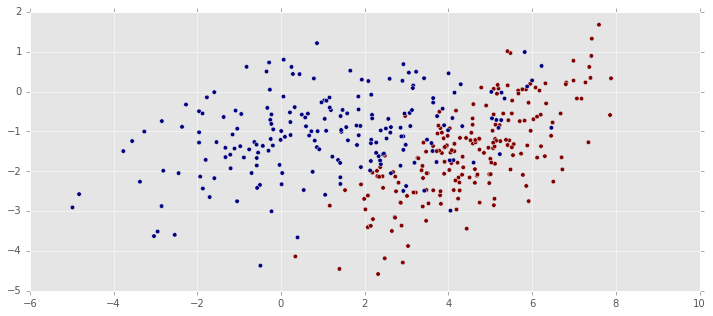

In [275]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(X[:,0], )

In [424]:
model = MySGDClassifier(alpha=0.01, max_epoch=1000, verbose=True, penalty=None)
model.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=1000, penalty=None, verbose=True)

In [425]:
accuracy_score(y, model.predict(X, 0.5))

0.88749999999999996

In [426]:
model.theta

array([-8.00425383,  1.62217887, -1.91984554])

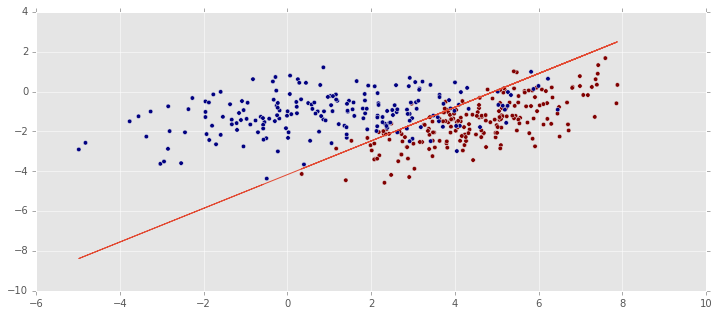

In [427]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(X[:,0], (-model.theta[1]/model.theta[2])*X[:,0] - model.theta[0]/model.theta[2])

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

In [ ]:
## Your Code Here

In [398]:
model1 = MySGDClassifier(alpha=0.0001, max_epoch=1000, verbose=True, penalty=None)
model1.fit(X, y)
model2 = MySGDClassifier(alpha=0.001, max_epoch=1000, verbose=True, penalty=None)
model2.fit(X, y)
model3 = MySGDClassifier(alpha=0.01, max_epoch=1000, verbose=True, penalty=None)
model3.fit(X, y)
model4 = MySGDClassifier(alpha=0.01, max_epoch=1000, verbose=True, C=0.01)
model4.fit(X, y)
model5 = MySGDClassifier(alpha=0.01, max_epoch=1000, verbose=True, C=0.01, penalty="l1")
model5.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, max_epoch=1000, penalty='l2', verbose=True)

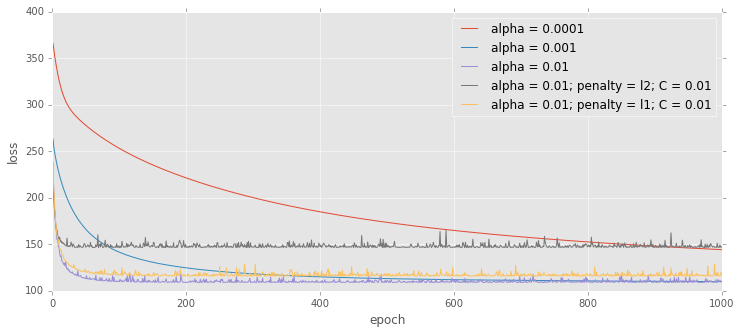

In [419]:
plt.plot(range(1, 1001), model1.loss_values, label = "alpha = 0.0001")
plt.plot(range(1, 1001), model2.loss_values, label = "alpha = 0.001")
plt.plot(range(1, 1001), model3.loss_values, label = "alpha = 0.01")
plt.plot(range(1, 1001), model4.loss_values, label = "alpha = 0.01; penalty = l2; C = 0.01")
plt.plot(range(1, 1001), model5.loss_values, label = "alpha = 0.01; penalty = l1; C = 0.01")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")